<a href="https://colab.research.google.com/github/Camilojaravila/202310_MINE-4206_ANALISIS_CON_MACHINE_LEARNING/blob/main/Laboratorio%202/Taller%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

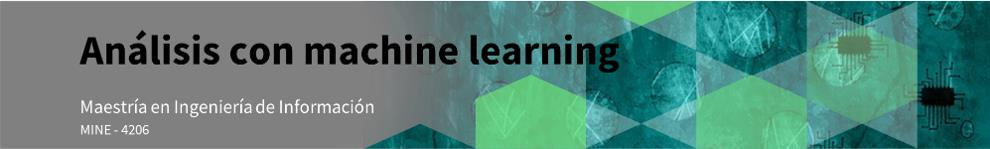

- **Integrante 1: Julián Sanabria Mejia**
- **Integrante 2: Iván Saavedra Villamil**
- **Integrante 3: Julián Barreto Mora**

Uno de los fenómenos más grandes que se presentan hoy en día son las opiniones de los usuarios sobre diferentes temas a través de Internet. Esta opinión es muy valiosa ya que permite saber en tiempo real y de primera mano los sentimientos que tienen las personas sobre un producto o servicio.

Es por ello, que una cadena hotelera en Andalucía ha decidido extraer la información de las opiniones de sus usuarios que han publicado en internet. Con el fin de poder entender cuáles son las ideas principales de los usuarios acerca de sus servicios, qué aspectos resaltan ellos sobre su servicios y, lo más importante, saber en qué pueden mejorar. Además, con este banco de datos esperan poder entrenar un modelo que les permita automáticamente determinar el sentimiento del usuario basado en las nuevas opiniones que puedan dejar.

Para poder tomar decisiones en este estudio, se debe presentar:

* Un análisis de las palabras más importantes en cada una de las categorías que le den relevancia a la cadena hotelera.

* Un proceso de limpieza y transformación de datos idóneo para el entrenamiento de los algoritmos.

* Una tabla comparativa, mostrando el rendimiento los tres mejores modelos entrenados con Random Forest, Naive Bayes y Adaboosting.

* A partir de la tabla comparativa, ¿cuál modelo ofrece el mejor rendimiento sobre el conjunto test? ¿Qué interpretación puedes darles a los valores obtenidos sobre las métricas de rendimiento?


**Datos**: Big_AHR.csv

## Diccionario de Datos

Se dan a disposición 13330 reviews de los usuarios los caules están compuestos de la siguiente forma:

* **Review’s title**: Título del review dado por el usuario.
* **5-scale rating**: Calificación del usuario. Escala de 1 a 5.
* **Text**: Review del usuario.
* **City_Region**: Región donde pertenece el hotel.
* **Hotel’s name**: Nombre del hotel evaluado.
* **Binary sentiment label** Clasificación sentimental. Donde 0 es Negativo, 1 es Positivo y 3 es Neutral.

Este es un modelo base, en este caso se realizó la predicción sobre el rating que podría dar un usuario.

Test Report
               precision    recall  f1-score   support

           1       0.77      0.81      0.79       326
           2       0.86      0.34      0.48       187
           3       0.65      0.60      0.62       465
           4       0.67      0.59      0.63       871
           5       0.83      0.93      0.88      1786

    accuracy                           0.77      3635
   macro avg       0.75      0.65      0.68      3635
weighted avg       0.76      0.77      0.76      3635



## 0. Importación de Librerías.

In [60]:
!pip install ydata-profiling
!pip install contractions
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\Julian\AppData\Roaming\nltk_data...
[nltk_data] 

True

In [85]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
from joblib import dump
%matplotlib inline

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

#Analisis profundo de datos
from ydata_profiling import ProfileReport
from pandas_profiling import ProfileReport

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC


## 1. Entendimiento del Negocio

Con base en el diccionario de datos proporcionado, la variable objetivo será el campo Binary sentiment label Clasificación sentimental, el cual puede tomar las siguentes tres categorias:

- 0 -> Negativo
- 1 -> Positvo
- 3 -> Neutral

Para entrenar los modelos se utilizará el campos review_text que contiene los comentarios de las calificaciones realizadas por los usuarios.


## 2. Entendimiento de los Datos

Se cargan los datos para iniciar su exploración.

In [62]:
url = './data/Big_AHR.txt'
data = pd.read_csv(url)
data

,Unnamed: 0,title,rating,review_text,location,hotel,label
0,0,Excelente y personal amable,5,Un hotel muy bueno. El personal fue muy amabl...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
1,1,Céntrico,4,"Muy buen hotel al nivel de lo esperado, habita...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
2,2,Hotel excepcional,5,Magnífico hotel. La verdad es que todo perfect...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
3,3,WOW!!,5,"Hotel hermoso, buen diseño, original, limpio. ...",Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
4,4,Magnifico,5,Magnífica ubicación en pleno centro de Sevilla...,Seville_Province_of_Seville_Andalucia,H10_Casa_de_la_Plata,1
...,...,...,...,...,...,...,...
18167,18167,remanso de paz en el corazón de Córdoba,5,Hemos empezado el año con una estancia de tres...,NaN,NaN,1
18168,18168,"Oasis de paz, tranquilidad y belleza!",5,Al atravesar el umbral de la puerta que conduc...,NaN,NaN,1
18169,18169,Un lugar para recordar,5,En este hotel todo son sensaciones y experienc...,NaN,NaN,1
18170,18170,Extraordinario,5,Hemos pasado un par de noches en este exquisit...,NaN,NaN,1


Separación de los conjuntos de entranamiento y prueba

In [63]:
train, test = train_test_split(data, test_size=0.2, random_state=33)
train

,Unnamed: 0,title,rating,review_text,location,hotel,label
15916,15916,Quizás la mejor opción en la zona,3,"Sí, hemos estado en mucho mejor B&B a precios ...",Palos_de_la_Frontera_Province_of_Huelva_Andalucia,Hotel_Santa_Maria,3
6607,6607,Esperaba más,3,La verdad es que lo mejor es su ubicación y el...,Granada_Province_of_Granada_Andalucia,Atenas,3
2119,2119,Sencillez y buen cuidado para sordos,3,Establecimiento muy sencillo pero que evidenci...,Seville_Province_of_Seville_Andalucia,Pension_Dona_Trinidad,3
11381,11381,De los peores hoteles exe,3,Me daba ciertas garantías un exe pero la limpi...,Cordoba_Province_of_Cordoba_Andalucia,Exe_Ciudad_de_Cordoba,3
3803,3803,NocheMagica en Malaga,5,Un lugar maravilloso. Una casa llena de rincon...,Malaga_Costa_del_Sol_Province_of_Malaga,Hotel_Soho_Boutique_Castillo_de_Santa_Catalina,1
...,...,...,...,...,...,...,...
10435,10435,Alojamiento con encanto en el centro.,5,Estuvimos 4 días en estos apartamentos - estud...,Cordoba_Province_of_Cordoba_Andalucia,Apartamentos_Cordoba_Atrium,1
57,57,Excelente elección para visitar Sevilla,5,Buena localización a 25 minutos de la catedral...,Seville_Province_of_Seville_Andalucia,Melia_Sevilla,1
578,578,Muy buen trato y muy buena calidad,5,Primero para nosotros es muy importante el tra...,Seville_Province_of_Seville_Andalucia,Hotel_Kivir,1
5848,5848,Recomendado!!,5,"Buen lugar, con agradables espacios y una amab...",Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,El_Riad_Andaluz,1


Se utiliza pandas-profiling para realizar el EDA (análisis exploratorio de datos)

In [15]:
ProfileReport(train)

Render HTML: 100%|██████████| 1/1 [00:01<00:00,  1.09s/it]


El EDA ratifica la decisión de utilizar la columna review_text para entrenar los modelos y la columna label como variable obejtivo. Ya que ninguna de las dos columnas presenta valores nulos, no es necesario ninguna tarea de limpieza.

### 2.1. Análisis de las palabras más importantes por Categoría

Definición de función que grafica una nube con las palabras más importantes por Categoría

In [18]:
pip install wordcloud

     -------------------------------------- 153.1/153.1 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [19]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
 

def mostrar_nube(palabras,stopwords=[]):
    comment_words = ''
    
    # iterate through the csv file
    for val in palabras:
        
        # typecaste each val to string
        val = str(val)
    
        # split the value
        tokens = val.split()
        
        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        comment_words += " ".join(tokens)+" "
    
    wordcloud = WordCloud(width = 800, height = 800,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    
    # plot the WordCloud image                      
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

Se eliminan los stopwords de los textos de review y se grafica una nube de palabras por cada una de tres categorías de la variable objetivo

---------- Words for class: 3 ----------


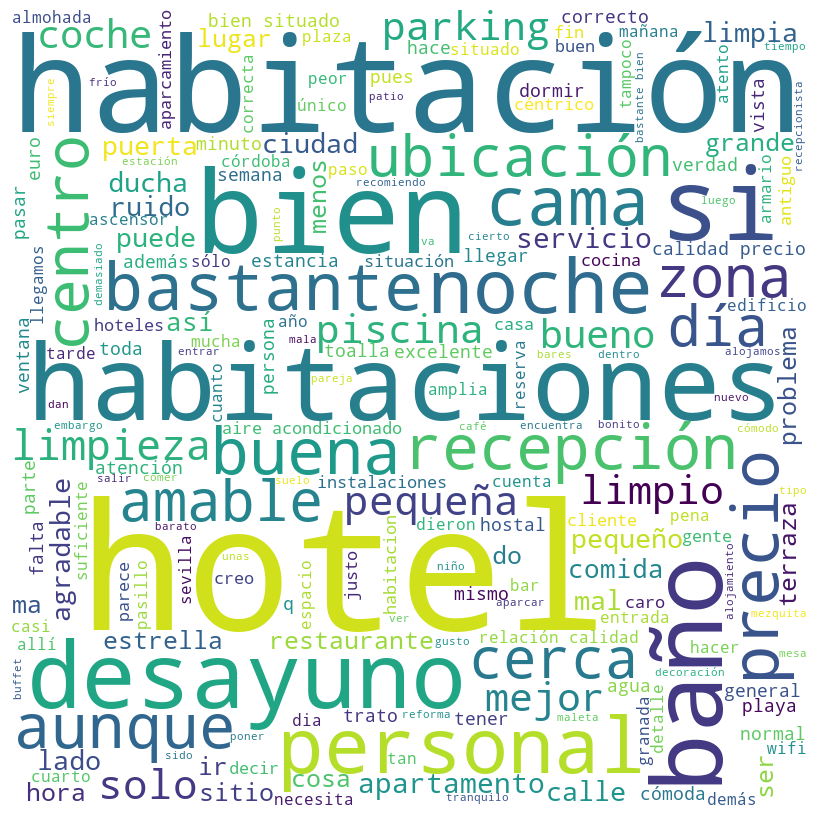

---------- Words for class: 1 ----------


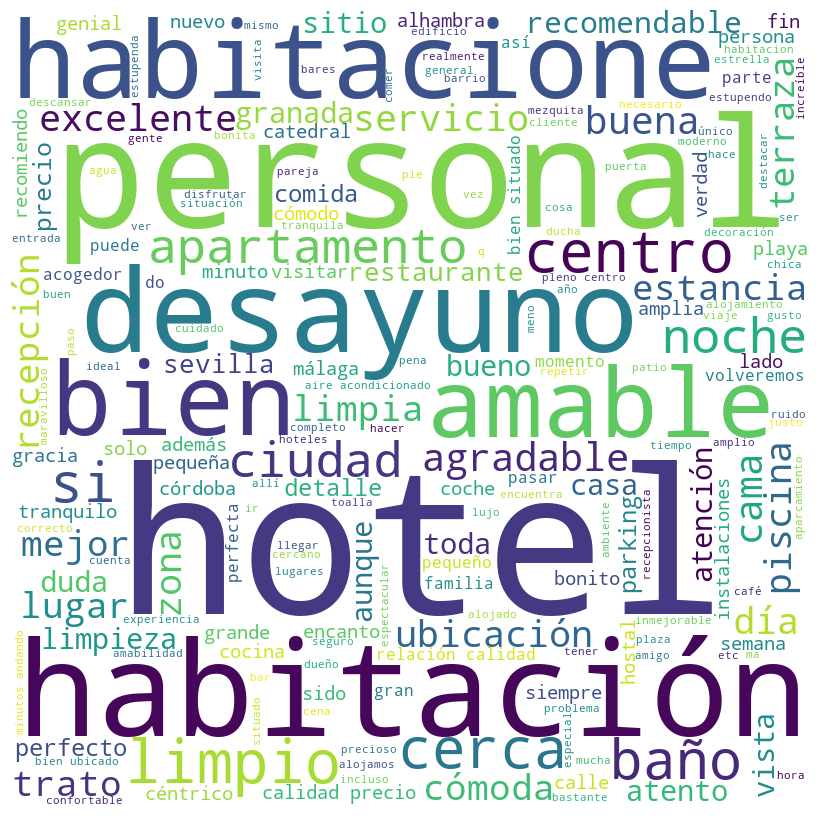

---------- Words for class: 0 ----------


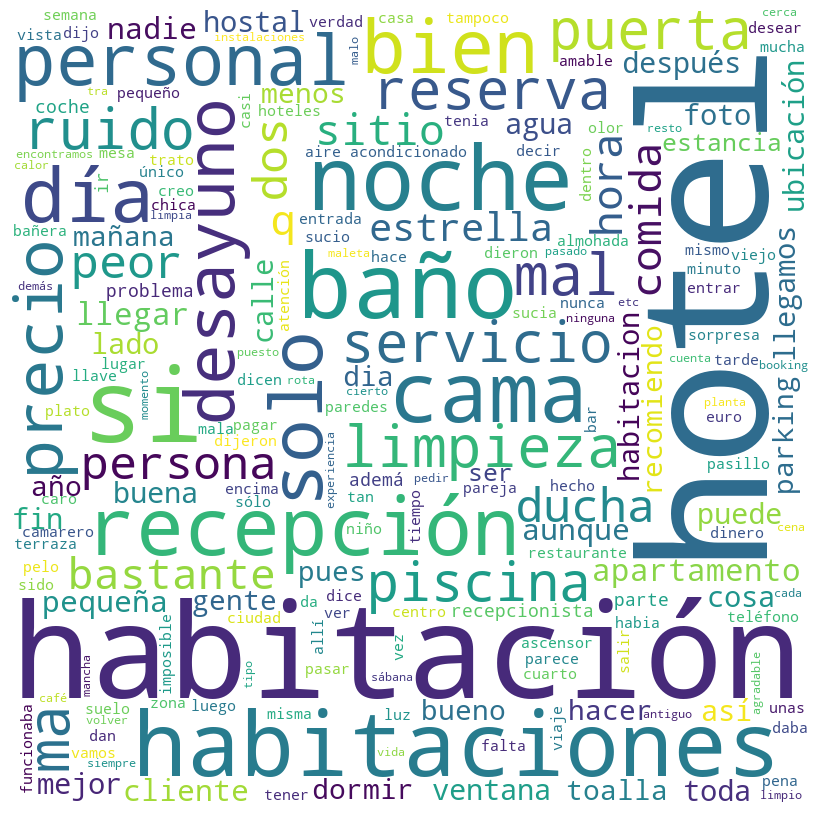

In [20]:
stop_words = stopwords.words('spanish')

for i in train['label'].unique():
    print(f'---------- Words for class: {i} ----------')
    mostrar_nube(train.loc[train['label']==i,'review_text'], stopwords=stop_words)

## 3. Preparación de los datos

Sepración de variable objetivo y variable predictora

In [64]:
X_train, y_train = train['review_text'], train['label'] 
display(X_train)
y_train


15916    Sí, hemos estado en mucho mejor B&B a precios ...
6607     La verdad es que lo mejor es su ubicación y el...
2119     Establecimiento muy sencillo pero que evidenci...
11381    Me daba ciertas garantías un exe pero la limpi...
3803     Un lugar maravilloso. Una casa llena de rincon...
                               ...                        
10435    Estuvimos 4 días en estos apartamentos - estud...
57       Buena localización a 25 minutos de la catedral...
578      Primero para nosotros es muy importante el tra...
5848     Buen lugar, con agradables espacios y una amab...
2439     Sin duda volvería a este hotel que puede ser u...
Name: review_text, Length: 14537, dtype: object

15916    3
6607     3
2119     3
11381    3
3803     1
        ..
10435    1
57       1
578      1
5848     1
2439     1
Name: label, Length: 14537, dtype: int64

### 3.1. Eliminación del Ruido

Se procede a definir las funciones para eliminar carácteres especiales, suprimir signos de puntuación, conviertir los números a letras, quitar las tildes de las vocales y dejar todo el texto en minúsculas.

In [65]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words, stopwords=stopwords.words('spanish')):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def preproccesing(words):
    words = to_lowercase(words)
    words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words


### 3.2. Tokenización

La tokenización divide los texto de las review en palabras para su posterior análisis.

In [66]:
new_X_train = X_train.apply(word_tokenize)
new_X_train = new_X_train.apply(preproccesing) #Aplica la eliminación del ruido
new_X_train.head()

15916    [si, mejor, b, b, precios, comparables, diseno...
6607     [verdad, mejor, ubicacion, personal, atento, m...
2119     [establecimiento, sencillo, evidencia, interes...
11381    [daba, ciertas, garantias, exe, limpieza, mala...
3803     [lugar, maravilloso, casa, llena, rincones, hi...
Name: review_text, dtype: object

### 3.3. Normalización

En la normalización se lleva cada palabra a su forma base (Lematización) y/o se llevan las palabras a su forma raíz (Stemming).

In [67]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = SnowballStemmer('spanish')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    words = lemmatize_verbs(words)
    words = stem_words(words)
    return words

new_X_train_2 = new_X_train.apply(stem_and_lemmatize) #Aplica lematización y Eliminación de Prefijos y Sufijos.
new_X_train_2.head()

15916    [si, mejor, b, b, preci, compar, disen, medioc...
6607     [verd, mejor, ubicacion, personal, atent, mome...
2119     [establec, sencill, evident, inter, respons, m...
11381    [dab, ciert, garanti, exe, limpiez, mal, ten, ...
3803     [lug, maravill, cas, llen, rincon, histori, pe...
Name: review_text, dtype: object

### 3.4. Transformación de campos

La nueva columna transformada se adiciona al dataframe original de entrenamiento

In [68]:
train['trans'] = new_X_train_2.apply(lambda x: ' '.join(map(str, x)))
train

,Unnamed: 0,title,rating,review_text,location,hotel,label,trans
15916,15916,Quizás la mejor opción en la zona,3,"Sí, hemos estado en mucho mejor B&B a precios ...",Palos_de_la_Frontera_Province_of_Huelva_Andalucia,Hotel_Santa_Maria,3,si mejor b b preci compar disen mediocr mejor ...
6607,6607,Esperaba más,3,La verdad es que lo mejor es su ubicación y el...,Granada_Province_of_Granada_Andalucia,Atenas,3,verd mejor ubicacion personal atent moment hab...
2119,2119,Sencillez y buen cuidado para sordos,3,Establecimiento muy sencillo pero que evidenci...,Seville_Province_of_Seville_Andalucia,Pension_Dona_Trinidad,3,establec sencill evident inter respons manten ...
11381,11381,De los peores hoteles exe,3,Me daba ciertas garantías un exe pero la limpi...,Cordoba_Province_of_Cordoba_Andalucia,Exe_Ciudad_de_Cordoba,3,dab ciert garanti exe limpiez mal ten 1430h au...
3803,3803,NocheMagica en Malaga,5,Un lugar maravilloso. Una casa llena de rincon...,Malaga_Costa_del_Sol_Province_of_Malaga,Hotel_Soho_Boutique_Castillo_de_Santa_Catalina,1,lug maravill cas llen rincon histori personal ...
...,...,...,...,...,...,...,...,...
10435,10435,Alojamiento con encanto en el centro.,5,Estuvimos 4 días en estos apartamentos - estud...,Cordoba_Province_of_Cordoba_Andalucia,Apartamentos_Cordoba_Atrium,1,four dias apartament estudi situacion inmejor ...
57,57,Excelente elección para visitar Sevilla,5,Buena localización a 25 minutos de la catedral...,Seville_Province_of_Seville_Andalucia,Melia_Sevilla,1,buen localizacion twentyfiv minut catedral pie...
578,578,Muy buen trato y muy buena calidad,5,Primero para nosotros es muy importante el tra...,Seville_Province_of_Seville_Andalucia,Hotel_Kivir,1,primer import trat recepcion cafeteri sid magn...
5848,5848,Recomendado!!,5,"Buen lugar, con agradables espacios y una amab...",Malaga_Costa_del_Sol_Province_of_Malaga_Andalucia,El_Riad_Andaluz,1,buen lug agrad espaci amabl atencion duen habi...


Se puede realizar la transformación Term-frecuency times inverse Document-frecuency (TD-IDF) ya que consideramos que aporta mayor información. Sin embargo, se probarán 3 diferentes métodos de transformación.

In [69]:
tf_idf = TfidfVectorizer()
X_tf_idf = tf_idf.fit_transform(train['trans'])
print(X_tf_idf.shape)

(14537, 17101)


### 3.5. Análisis de las palabras más importantes por Categoría despues de Eliminación de Ruido, Tokenización y Normalización

---------- Words for class: 3 ----------


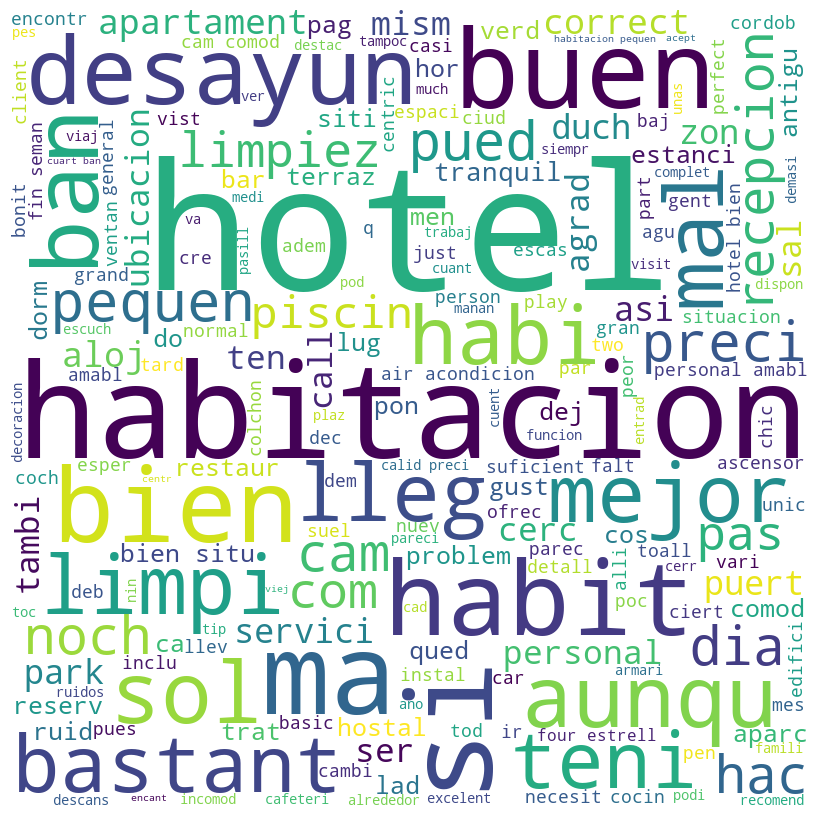

---------- Words for class: 1 ----------


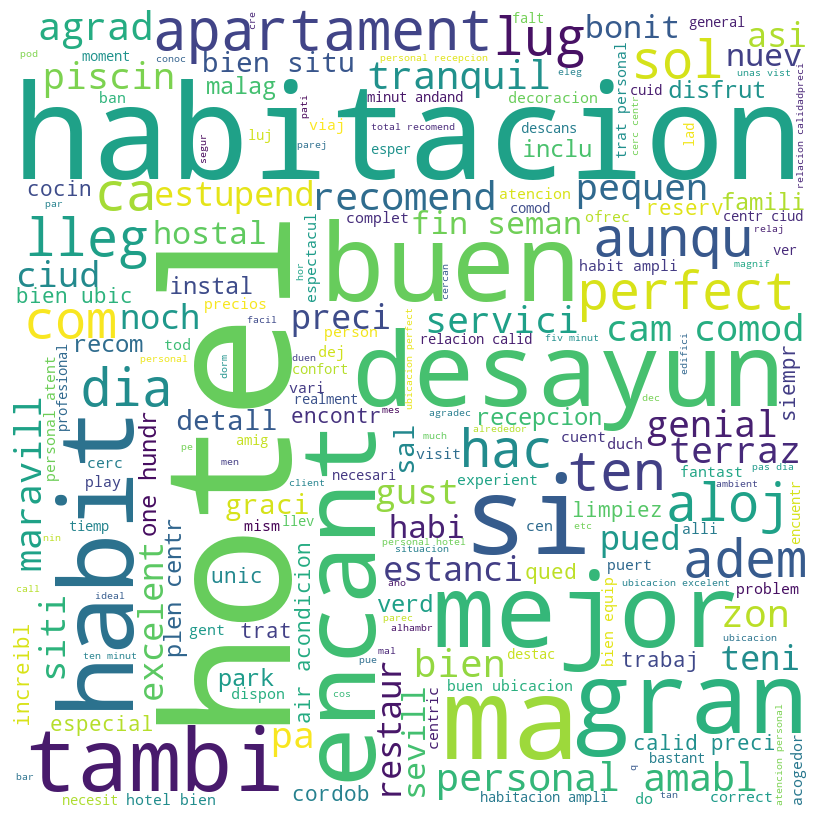

---------- Words for class: 0 ----------


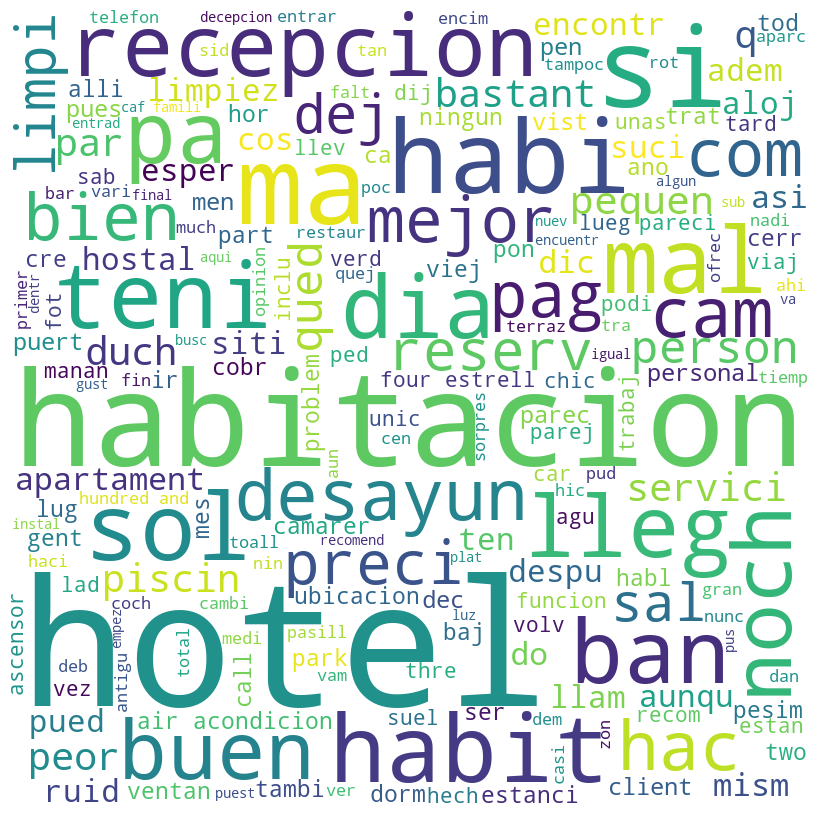

In [39]:
for i in train['label'].unique():
    print(f'---------- Words for class: {i} ----------')
    mostrar_nube(train.loc[train['label']==i,'trans'], stopwords=stop_words)

## 4. Modelado

Se definen las funciones a utilizar en el Pipeline para automatizar la preparación de datos

In [70]:
class TextPreprocessing(BaseEstimator,TransformerMixin):
    def __init__(self,stopwords=stopwords.words('spanish')):
        self.stopwords = stopwords

    def remove_non_ascii(self, words):
        """Remove non-ASCII characters from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    def to_lowercase(self, words):
        """Convert all characters to lowercase from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    def remove_punctuation(self, words):
        """Remove punctuation from list of tokenized words"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    def replace_numbers(self, words):
        """Replace all interger occurrences in list of tokenized words with textual representation"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    def remove_stopwords(self, words):
        """Remove stop words from list of tokenized words"""
        new_words = []
        for word in words:
            if word not in self.stopwords:
                new_words.append(word)
        return new_words

    def stem_words(self, words):
        """Stem words in list of tokenized words"""
        stemmer = SnowballStemmer('spanish')
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    def lemmatize_verbs(self, words):
        """Lemmatize verbs in list of tokenized words"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

    def stem_and_lemmatize(self, words):
        words = self.stem_words(words)
        words = self.lemmatize_verbs(words)
        return words

    def preproccesing(self, words):
        words = self.to_lowercase(words)
        words = self.replace_numbers(words)
        words = self.remove_punctuation(words)
        words = self.remove_non_ascii(words)
        words = self.remove_stopwords(words)
        return words

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        new_X_train = pd.Series(X)
        new_X_train = new_X_train.apply(contractions.fix)
        new_X_train = new_X_train.apply(word_tokenize)
        new_X_train = new_X_train.apply(lambda x: self.preproccesing(x))
        new_X_train = new_X_train.apply(lambda x: self.stem_and_lemmatize(x))
        new_X_train = new_X_train.apply(lambda x: ' '.join(map(str, x)))
        return new_X_train

### 4.1. Modelado Random Forest

Definición del Pipeline para entrenar múltiples modelo del algoritmo Random Forest 

In [ ]:
%%time
estimators_RandomForest = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        # ('classifier', SVC(kernel='linear', probability=True)) -> cambiar algoritmo y sus hiperparámetros
    ]

pipe_RandomForest = Pipeline(estimators_RandomForest)

pipe_RandomForest.fit(X_train, y_train)

### 4.2. Modelado Naive Bayes

Definición del Pipeline para entrenar múltiples modelo del algoritmo Naive Bayes

In [71]:
from sklearn.naive_bayes import ComplementNB

Se utilizará el algoritmo Complement Naive Bayes ya que nuestro problema es multiclase y las clases se encuntran desbalanceadas.

In [76]:
estimators_NaiveBayes = [
        ('preproccess',TextPreprocessing()),
        ('transform',TfidfVectorizer(lowercase=False)),
        ('classifier', ComplementNB())
    ]

pipe_NaiveBayes = Pipeline(estimators_NaiveBayes)

parameters_NaiveBayes = {
              'transform':[CountVectorizer(binary=True,lowercase=False),
                            CountVectorizer(lowercase=False),
                            TfidfVectorizer(lowercase=False)],
              'classifier__alpha': [0.01, 0.1, 1, 10, 100],
              'classifier__norm': [True, False]
              }

grid_search_NaiveBayes = GridSearchCV(pipe_NaiveBayes, parameters_NaiveBayes, verbose=2, scoring='neg_mean_squared_error', cv=10)

- Se aplica todas las funciones de preprocesamiento, se realiza una transformación para convertir los datos en una matriz (palabra - documento) y para los pesos se prueba con 3 diferentes métodos.

- Se prueban múltiples valores para dos hiperparámetros (alpha y norm) del algoritmo ComplementNB.

- Para puntuar los diferntes modelos a entrenar se utiliza MSE y se aplica una validación cruzada de 10 subconjuntos.

In [77]:
%%time
grid_search_NaiveBayes.fit(X_train,y_train)

Fitting 10 folds for each of 30 candidates, totalling 300 fits
[CV] END classifier__alpha=0.01, classifier__norm=True, transform=CountVectorizer(binary=True, lowercase=False); total time=  26.4s
[CV] END classifier__alpha=0.01, classifier__norm=True, transform=CountVectorizer(binary=True, lowercase=False); total time=  23.4s
[CV] END classifier__alpha=0.01, classifier__norm=True, transform=CountVectorizer(binary=True, lowercase=False); total time=  23.7s
[CV] END classifier__alpha=0.01, classifier__norm=True, transform=CountVectorizer(binary=True, lowercase=False); total time=  23.5s
[CV] END classifier__alpha=0.01, classifier__norm=True, transform=CountVectorizer(binary=True, lowercase=False); total time=  23.4s
[CV] END classifier__alpha=0.01, classifier__norm=True, transform=CountVectorizer(binary=True, lowercase=False); total time=  24.3s
[CV] END classifier__alpha=0.01, classifier__norm=True, transform=CountVectorizer(binary=True, lowercase=False); total time=  23.7s
[CV] END clas

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preproccess', TextPreprocessing()),
                                       ('transform',
                                        TfidfVectorizer(lowercase=False)),
                                       ('classifier', ComplementNB())]),
             param_grid={'classifier__alpha': [0.01, 0.1, 1, 10, 100],
                         'classifier__norm': [True, False],
                         'transform': [CountVectorizer(binary=True,
                                                       lowercase=False),
                                       CountVectorizer(lowercase=False),
                                       TfidfVectorizer(lowercase=False)]},
             scoring='neg_mean_squared_error', verbose=2)

Se identifican los valores de los hiperparámetros para el mejor modelo encontrado de Naive Bayes

In [78]:
best_model_NaiveBayes = grid_search_NaiveBayes.best_estimator_
grid_search_NaiveBayes.best_params_

{'classifier__alpha': 1,
 'classifier__norm': True,
 'transform': CountVectorizer(binary=True, lowercase=False)}

El mejor modelo de Naive Bayes se aplica sobre el cojunto de entrenamiento (train) y se toma métricas.

In [79]:
y_pred_train_NaiveBayes = best_model_NaiveBayes.predict(X_train)
y_pred_train_NaiveBayes

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [80]:
report_NaiveBayes = classification_report(y_train, y_pred_train_NaiveBayes)

print("Train Report for Naive Bayes Complement\n", report_NaiveBayes)

Train Report for Naive Bayes Complement
               precision    recall  f1-score   support

           0       0.91      0.81      0.86      2158
           1       0.86      1.00      0.92     10570
           3       0.95      0.17      0.29      1809

    accuracy                           0.87     14537
   macro avg       0.91      0.66      0.69     14537
weighted avg       0.88      0.87      0.83     14537



se procede a guardar el mejor modelo de Naive Bayes

In [86]:
dump(grid_search_NaiveBayes.best_estimator_, './models/NaiveBayesModel.joblib')

['./models/NaiveBayesModel.joblib']

In [ ]:
# cargar modelo
# Naive_Bayes_Model = joblib.load("./models/NaiveBayesModel.joblib")

### 4.3. Modelado Adaboosting

Definición del Pipeline para entrenar múltiples modelo del algoritmo Adaboosting

In [ ]:
%%time
estimators_Adaboosting = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        # ('classifier', SVC(kernel='linear', probability=True)) -> cambiar algoritmo y sus hiperparámetros
    ]

pipe_Adaboosting = Pipeline(estimators_Adaboosting)

pipe_Adaboosting.fit(X_train, y_train)

## 5. Producción

Se separa las variables para el conjunto de pruebas:

In [82]:
X_test, y_test = test['review_text'], test['label'] 

Se evalúa cómo le va a los tres mejores modelos de cada algoritmo con los datos que no conocen (test):

### 5.1. Producción Random Forest

### 5.2. Producción Naive Bayes

In [83]:
y_pred_test_NaiveBayes = best_model_NaiveBayes.predict(X_test)
report_NaiveBayes_test = classification_report(y_test, y_pred_test_NaiveBayes)
print("Test Report for Naive Bayes Complement\n", report_NaiveBayes_test)

Test Report for Naive Bayes Complement
               precision    recall  f1-score   support

           0       0.90      0.72      0.80       513
           1       0.83      1.00      0.91      2657
           3       0.85      0.09      0.16       465

    accuracy                           0.84      3635
   macro avg       0.86      0.60      0.62      3635
weighted avg       0.85      0.84      0.80      3635



### 5.3. Producción Adaboosting